[codebasic](https://www.youtube.com/watch?v=9yl6-HEY7_s&list=PLeo1K3hjS3uvCeTYTeyfe0-rN5r8zn9rw&index=6)

In [5]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

df = pd.read_csv("homeprices.csv")
print(df)
print(df.shape)

df = pd.get_dummies(df, columns=['town']).drop(columns=['town_west windsor'])    
print(df)
print(df.shape)

               town  area   price
0   monroe township  2600  550000
1   monroe township  3000  565000
2   monroe township  3200  610000
3   monroe township  3600  680000
4   monroe township  4000  725000
5      west windsor  2600  585000
6      west windsor  2800  615000
7      west windsor  3300  650000
8      west windsor  3600  710000
9       robinsville  2600  575000
10      robinsville  2900  600000
11      robinsville  3100  620000
12      robinsville  3600  695000
(13, 3)
    area   price  town_monroe township  town_robinsville
0   2600  550000                     1                 0
1   3000  565000                     1                 0
2   3200  610000                     1                 0
3   3600  680000                     1                 0
4   4000  725000                     1                 0
5   2600  585000                     0                 0
6   2800  615000                     0                 0
7   3300  650000                     0                 0
8  

(13, 3)
(13,)
    area   price  town_monroe township  town_robinsville     price_pred
0   2600  550000                     1                 0  539709.739841
1   3000  565000                     1                 0  590468.716405
2   3200  610000                     1                 0  615848.204687
3   3600  680000                     1                 0  666607.181251
4   4000  725000                     1                 0  717366.157816
5   2600  585000                     0                 0  579723.715330
6   2800  615000                     0                 0  605103.203612
7   3300  650000                     0                 0  668551.924317
8   3600  710000                     0                 0  706621.156740
9   2600  575000                     0                 1  565396.151365
10  2900  600000                     0                 1  603465.383788
11  3100  620000                     0                 1  628844.872071
12  3600  695000                     0            

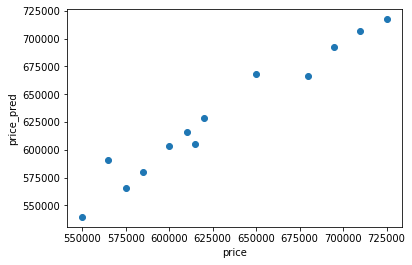

0.9573929037221873


In [6]:
x = df[['area', 'town_monroe township', 'town_robinsville']]
y = df.price
print(x.shape)
print(y.shape)

reg = linear_model.LinearRegression()
reg.fit(x, y)
price_pred = reg.predict(x)
df['price_pred'] = price_pred
# df.price_pred = price_pred # this is not what I want
print(df)

plt.scatter(df.price, df.price_pred)
plt.xlabel('price')
plt.ylabel('price_pred')
plt.show()
print(reg.score(x,y)) # Returns the coefficient of determination R^2 of the prediction

In [7]:
x = [[3000, 0, 1]]
y_hat = reg.predict(x)
print(y_hat)

y_hat2 = np.sum(reg.coef_ * x, axis=1) + reg.intercept_ 
print(reg.coef_) # [beta_1, beta_2, beta_3]
print(reg.intercept_) # alpha
print(y_hat2)

[616155.12792948]
[   126.89744141 -40013.97548914 -14327.56396474]
249790.36766292533
[616155.12792948]


In [17]:
x = [[3000, 0, 1],
     [2500, 0, 0]]
y_hat = reg.predict(x)
print(y_hat)

y_hat2 = np.sum(reg.coef_ * x, axis=1) + reg.intercept_  
print(reg.coef_)
print(reg.intercept_)
print(y_hat2)

[616155.12792948 567033.971189  ]
[   126.89744141 -40013.97548914 -14327.56396474]
249790.36766292533
[616155.12792948 567033.971189  ]


<h2 style='color:green'>Exercise</h2>

At the same level as this notebook on github, there is an Exercise folder that contains carprices.csv.
This file has car sell prices for 3 different models. First plot data points on a scatter plot chart
to see if linear regression model can be applied. If yes, then build a model that can answer
following questions,

**1) Predict price of a mercedez benz that is 4 yr old with mileage 45000**

**2) Predict price of a BMW X5 that is 7 yr old with mileage 86000**

**3) Tell me the score (accuracy) of your model. (Hint: use LinearRegression().score())**